In [69]:
import numpy as np
import pandas as pd

In [70]:
results=pd.read_excel('3_1 results.xls','TSheetConsolidated')

In [71]:
results.head()

,HT No,Name,Status,Branch,Sem Credits,Tot Credits,SGPA,CGPA
0,16211A1210,B SANHITHA,FAIL,IT,10,68,NaN,NaN
1,16211A1260,KALIDINDI MANOJ KUMAR VARMA,FAIL,IT,13,88,NaN,NaN
2,16211A1272,MANCHINENI ROHITH,FAIL,IT,17,86,NaN,NaN
3,16211A0149,GANGADHARI DHANOJ,FAIL,CIVIL,14,83,NaN,NaN
4,16211A0162,MULUKALLA VINITH REDDY,FAIL,CIVIL,4,78,NaN,NaN


In [72]:
df=results[['HT No','Status','Branch','SGPA']]

In [73]:
df.head()

,HT No,Status,Branch,SGPA
0,16211A1210,FAIL,IT,NaN
1,16211A1260,FAIL,IT,NaN
2,16211A1272,FAIL,IT,NaN
3,16211A0149,FAIL,CIVIL,NaN
4,16211A0162,FAIL,CIVIL,NaN


In [74]:
df['SGPA'].fillna(0.0,inplace=True)

C:\Users\DELL\Anaconda3\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [75]:
df.head()

,HT No,Status,Branch,SGPA
0,16211A1210,FAIL,IT,0.0
1,16211A1260,FAIL,IT,0.0
2,16211A1272,FAIL,IT,0.0
3,16211A0149,FAIL,CIVIL,0.0
4,16211A0162,FAIL,CIVIL,0.0


In [76]:
sgpa_sum=df.groupby('Status')['SGPA'].count()

In [77]:
sgpa_sum

Status
FAIL    239
PASS    988
Name: SGPA, dtype: int64

In [78]:
total_count=sgpa_sum.sum()

In [79]:
total_count

1227

In [80]:
total_percentage=sgpa_sum.apply(lambda x: 100*x/total_count)

In [81]:
total_percentage

Status
FAIL    19.478403
PASS    80.521597
Name: SGPA, dtype: float64

In [82]:
type(total_percentage)

pandas.core.series.Series

In [83]:
import matplotlib.pyplot as plt
%matplotlib inline

In [84]:
labels=['Fail','Pass']

In [85]:
colors=['lightcoral','yellowGreen']

In [86]:
explode=[0.1,0]

([<matplotlib.patches.Wedge at 0x26fad15be80>,
 [Text(0.9822475964188278, 0.6893400172117063, 'Fail'),
  Text(-0.9003935413071615, -0.6318951422287948, 'Pass')],
 [Text(0.5729777645776495, 0.40211501004016204, '19.5%'),
  Text(-0.4911237498039062, -0.3446700775793426, '80.5%')])

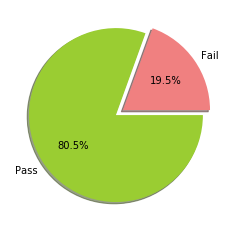

In [87]:
plt.pie(total_percentage, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True)

### Pass and fail percentage branch wise

In [88]:
branch_wise=df.groupby(['Branch','Status'])['SGPA'].count()

In [89]:
branch_wise

Branch  Status
BME     FAIL        5
        PASS       18
CHE     FAIL       22
        PASS       31
CIVIL   FAIL       38
        PASS      102
CSE     FAIL       54
        PASS      284
ECE     FAIL       40
        PASS      237
EEE     FAIL       25
        PASS      115
IT      FAIL       31
        PASS       88
MECH    FAIL       24
        PASS      113
Name: SGPA, dtype: int64

In [90]:
type(branch_wise)

pandas.core.series.Series

### cse branch

In [91]:
cse_sum=branch_wise['CSE']

In [92]:
cse_sum

Status
FAIL     54
PASS    284
Name: SGPA, dtype: int64

In [93]:
cse_total=cse_sum.sum()

In [94]:
cse_total

338

([<matplotlib.patches.Wedge at 0x26fac978c50>,
 [Text(1.0519976008026768, 0.5773223085118157, 'Fail'),
  Text(-0.9643311836175305, -0.5292120258486317, 'Pass')],
 [Text(0.6136652671348947, 0.3367713466318924, '16.0%'),
  Text(-0.5259988274277438, -0.2886611050083445, '84.0%')])

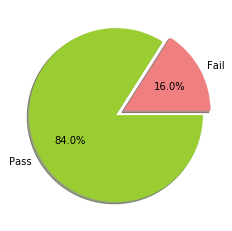

In [95]:
plt.pie(cse_sum,labels=labels,explode=explode,colors=colors,autopct='%1.1f%%',shadow=True)

### IT Branch

In [96]:
it_branch_sum=branch_wise['IT']

In [97]:
it_branch_sum

Status
FAIL    31
PASS    88
Name: SGPA, dtype: int64

In [98]:
it_total=it_branch_sum.sum()

In [99]:
it_total

119

([<matplotlib.patches.Wedge at 0x26fac6233c8>,
 [Text(0.8200698375435849, 0.8760624758264894, 'Fail'),
  Text(-0.7517306092273017, -0.803057339889718, 'Pass')],
 [Text(0.47837407190042447, 0.5110364442321188, '26.1%'),
  Text(-0.41003487776034636, -0.4380312763034825, '73.9%')])

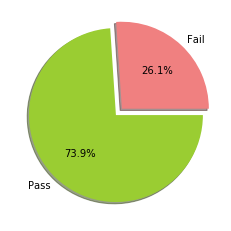

In [100]:
plt.pie(it_branch_sum,labels=labels,explode=explode,colors=colors,autopct='%1.1f%%',shadow=True)

### ECE Branch

In [101]:
ece_sum=branch_wise['ECE']

In [102]:
ece_sum

Status
FAIL     40
PASS    237
Name: SGPA, dtype: int64

In [103]:
ece_total=ece_sum.sum()

In [104]:
ece_total

277

([<matplotlib.patches.Wedge at 0x26faee04a58>,
 [Text(1.0786191296872691, 0.5259094723169362, 'Fail'),
  Text(-0.988734224781295, -0.4820836366712023, 'Pass')],
 [Text(0.6291944923175736, 0.3067805255182128, '14.4%'),
  Text(-0.5393095771534335, -0.26295471091156486, '85.6%')])

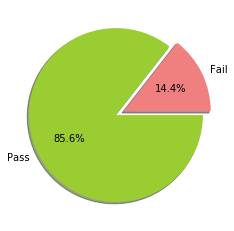

In [105]:
plt.pie(ece_sum,labels=labels,explode=explode,colors=colors,autopct='%1.1f%%',shadow=True)

### EEE Branch

In [106]:
eee_sum=branch_wise['EEE']

In [107]:
eee_sum

Status
FAIL     25
PASS    115
Name: SGPA, dtype: int64

In [108]:
eee_total=eee_sum.sum()

In [109]:
eee_total

140

([<matplotlib.patches.Wedge at 0x26faef55908>,
 [Text(1.0160690305346658, 0.6384385054085823, 'Fail'),
  Text(-0.9313965565297567, -0.5852353838281754, 'Pass')],
 [Text(0.592706934478555, 0.3724224614883396, '17.9%'),
  Text(-0.5080344853798673, -0.3192193002699138, '82.1%')])

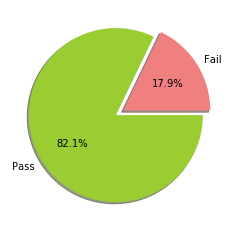

In [110]:
plt.pie(eee_sum,labels=labels,explode=explode,colors=colors,autopct='%1.1f%%',shadow=True)

### Mechanical Branch

In [111]:
mech_sum=branch_wise['MECH']

In [112]:
mech_sum

Status
FAIL     24
PASS    113
Name: SGPA, dtype: int64

In [113]:
mech_total=mech_sum.sum()

In [114]:
mech_total

137

([<matplotlib.patches.Wedge at 0x26faeb1c940>,
 [Text(1.0228085915284943, 0.6275847234401883, 'Fail'),
  Text(-0.9375745153033711, -0.5752860403778706, 'Pass')],
 [Text(0.5966383450582884, 0.3660910886734432, '17.5%'),
  Text(-0.511404281074566, -0.31379238566065665, '82.5%')])

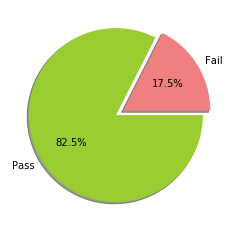

In [115]:
plt.pie(mech_sum,labels=labels,explode=explode,colors=colors,autopct='%1.1f%%',shadow=True)

### Civil Branch

([<matplotlib.patches.Wedge at 0x26fae9abb00>,
 [Text(0.7895264324491781, 0.9036857929966995, 'Fail'),
  Text(-0.7237325630784133, -0.8283786435803079, 'Pass')],
 [Text(0.4605570855953538, 0.5271500459147413, '27.1%'),
  Text(-0.394763216224589, -0.4518428964983497, '72.9%')])

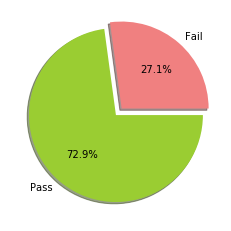

In [116]:
plt.pie(branch_wise['CIVIL'],labels=labels,explode=explode,colors=colors,autopct='%1.1f%%',shadow=True)

### BME Branch

([<matplotlib.patches.Wedge at 0x26faecf5ba8>,
 [Text(0.9308535658006225, 0.7573055123503765, 'Fail'),
  Text(-0.8532824678149302, -0.6941966797094774, 'Pass')],
 [Text(0.5429979133836964, 0.4417615488710529, '21.7%'),
  Text(-0.46542680062632547, -0.3786527343869876, '78.3%')])

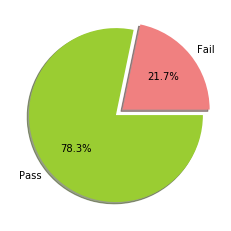

In [117]:
plt.pie(branch_wise['BME'],labels=labels,explode=explode,colors=colors,autopct='%1.1f%%',shadow=True)

### CHE Branch

([<matplotlib.patches.Wedge at 0x26faed87cc0>,
 [Text(0.31630457678915946, 1.1575627044364512, 'Fail'),
  Text(-0.2899457627094565, -1.0610991728800996, 'Pass')],
 [Text(0.1845110031270097, 0.6752449109212632, '41.5%'),
  Text(-0.1581522342051581, -0.5787813670255089, '58.5%')])

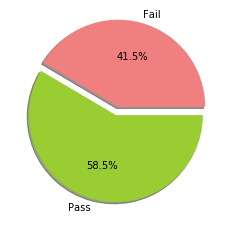

In [118]:
plt.pie(branch_wise['CHE'],labels=labels,explode=explode,colors=colors,autopct='%1.1f%%',shadow=True)

# Bar Graph

In [119]:
branch_wise

Branch  Status
BME     FAIL        5
        PASS       18
CHE     FAIL       22
        PASS       31
CIVIL   FAIL       38
        PASS      102
CSE     FAIL       54
        PASS      284
ECE     FAIL       40
        PASS      237
EEE     FAIL       25
        PASS      115
IT      FAIL       31
        PASS       88
MECH    FAIL       24
        PASS      113
Name: SGPA, dtype: int64

In [120]:
branch_wise=branch_wise.reset_index()

In [121]:
branch_wise

,Branch,Status,SGPA
0,BME,FAIL,5
1,BME,PASS,18
2,CHE,FAIL,22
3,CHE,PASS,31
4,CIVIL,FAIL,38
5,CIVIL,PASS,102
6,CSE,FAIL,54
7,CSE,PASS,284
8,ECE,FAIL,40
9,ECE,PASS,237


In [122]:
pi=branch_wise.pivot_table('SGPA','Branch','Status')

In [123]:
pi

Status,FAIL,PASS
Branch,,
BME,5,18
CHE,22,31
CIVIL,38,102
CSE,54,284
ECE,40,237
EEE,25,115
IT,31,88
MECH,24,113


In [124]:
pi['Total']=pi['FAIL']+pi['PASS']

In [125]:
pi

Status,FAIL,PASS,Total
Branch,,,
BME,5,18,23
CHE,22,31,53
CIVIL,38,102,140
CSE,54,284,338
ECE,40,237,277
EEE,25,115,140
IT,31,88,119
MECH,24,113,137


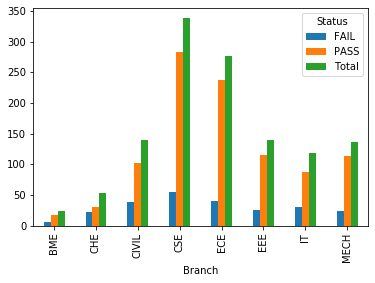

In [126]:
pi.plot(kind='bar')